# <center>Final Project 3</center>

Group 3 :
- Jasmine Nur Ramadhani (PYTN-KS20-016)
- Faizal Azmi Nurwardani (PYTN-KS20-020)
- Afifah Yulfahazani (PYTN-KS20-07)

# Pendahuluan
Datasets yang digunakan memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya.
Attribute Information:
   1. id
   2. timestamp
   3. hour
   4. day
   5. month
   6. datetime
   7. timezone
   8. source: destinasi awal
   9. destination: destinasi akhir
   10. cab_type: tipe transportasi (uber / lyft)
   11. … dan lainnya

Linear regression merupakan metode statistik yang digunakan untuk mengetahui hubungan linier antara variabel dependen (output) dengan satu atau lebih variabel independen (input).Dalam kasus ini atribut yang ada akan memprediksi target yaitu price antara uber vs lyft.


# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn as imbl
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import plotly.express as px
from random import randint
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, classification_report,ConfusionMatrixDisplay, mean_squared_error,r2_score, auc
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Cleaning

In [4]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [5]:
df = df.drop(['id', 'timestamp', 'datetime'], axis=1)

In [6]:
df.dropna(subset=['price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   timezone                     637976 non-null  object 
 4   source                       637976 non-null  object 
 5   destination                  637976 non-null  object 
 6   cab_type                     637976 non-null  object 
 7   product_id                   637976 non-null  object 
 8   name                         637976 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     637976 non-null  float64
 11  surge_multiplier             637976 non-null  float64
 12  latitude                     637976 non-null  float64
 13  long

In [7]:
pd.set_option("display.max.columns", None)     # Displaying maximum column
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
df.duplicated().sum()

55910

In [9]:
# Mengapus data duplikat
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582066 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         582066 non-null  int64  
 1   day                          582066 non-null  int64  
 2   month                        582066 non-null  int64  
 3   timezone                     582066 non-null  object 
 4   source                       582066 non-null  object 
 5   destination                  582066 non-null  object 
 6   cab_type                     582066 non-null  object 
 7   product_id                   582066 non-null  object 
 8   name                         582066 non-null  object 
 9   price                        582066 non-null  float64
 10  distance                     582066 non-null  float64
 11  surge_multiplier             582066 non-null  float64
 12  latitude                     582066 non-null  float64
 13  long

## Korelasi kondisi suhu dengan harga

In [11]:
temp_columns =df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
                'apparentTemperatureMax','price']]
temp_columns.head(10)

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0
5,38.75,33.51,40.61,24.07,34.97,12.04,34.19,1545076800,40.66,27.39,34.97,16.5
6,41.99,41.99,46.46,42.17,43.81,37.08,40.67,1543255200,46.46,37.45,43.81,10.5
7,49.88,49.22,50.80,44.97,50.13,45.62,36.32,1543788000,50.80,35.84,50.13,16.5
8,45.58,45.58,57.02,33.74,56.35,28.53,43.09,1543852800,57.02,39.90,56.35,3.0
9,45.45,41.77,46.91,33.82,44.01,30.19,36.34,1543320000,46.91,32.43,44.01,27.5


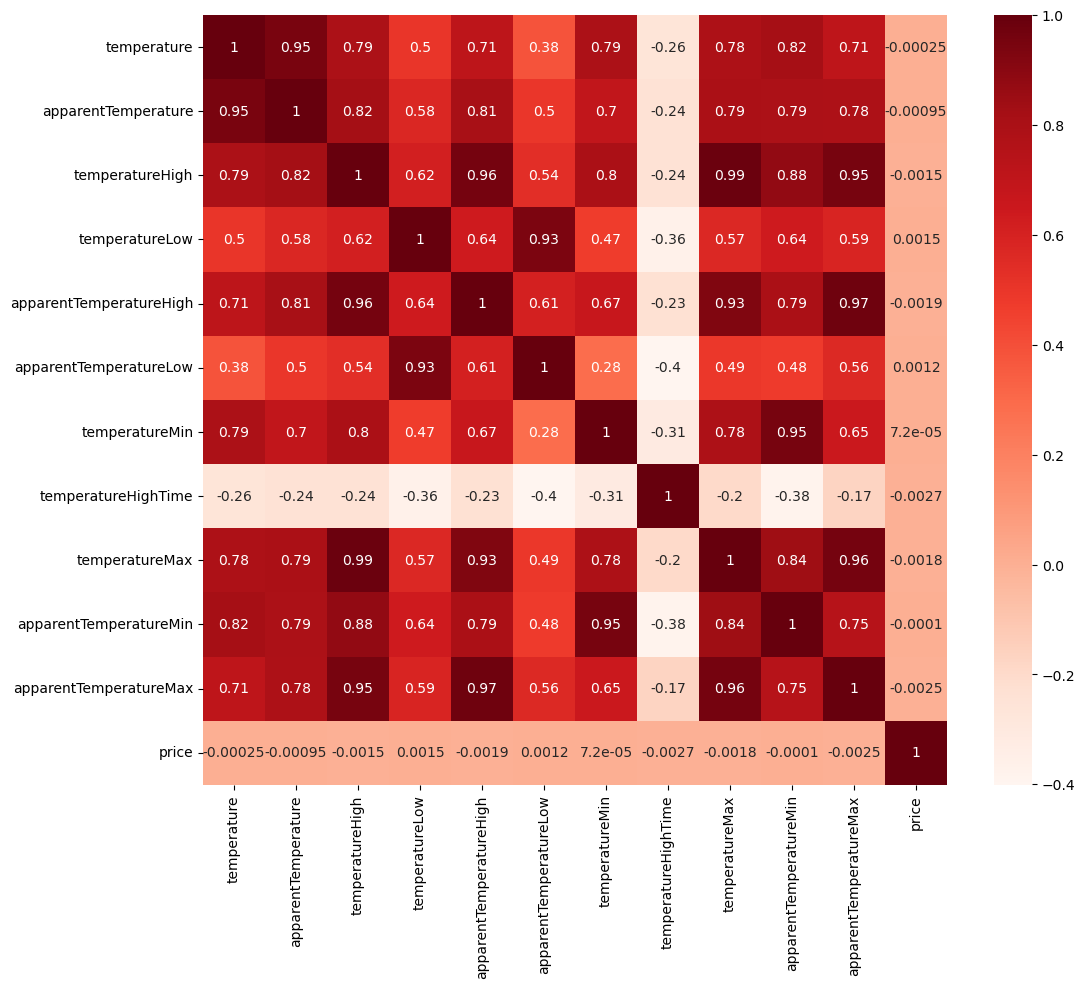

In [12]:
correlation = plt.figure(figsize=(12, 10))
sns.heatmap(temp_columns.corr(), cmap='Reds', annot=True)
plt.show() 

## Korelasi kondisi cuaca dengan harga

In [13]:
weather_column = df[['precipIntensity', 'precipProbability', 'humidity', 
                     'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 
                     'windBearing','cloudCover', 'uvIndex', 'ozone', 'moonPhase',
                       'precipIntensityMax','price']]
weather_column.head(10)

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0
5,0.0000,0.0,0.84,7.19,8.88,8.325,34.41,1000.46,294,1.00,1,335.8,0.33,0.0221,16.5
6,0.0000,0.0,0.91,0.53,0.88,4.675,39.54,1014.11,91,1.00,0,312.3,0.64,0.1245,10.5
7,0.0246,1.0,0.93,3.38,3.38,3.052,48.02,1004.33,159,1.00,0,282.5,0.86,0.0916,16.5
8,0.0000,0.0,0.96,1.25,2.09,1.413,44.50,1001.06,307,1.00,0,290.9,0.89,0.0004,3.0
9,0.0624,1.0,0.93,6.87,7.42,2.686,43.52,989.98,79,1.00,0,296.2,0.68,0.1425,27.5


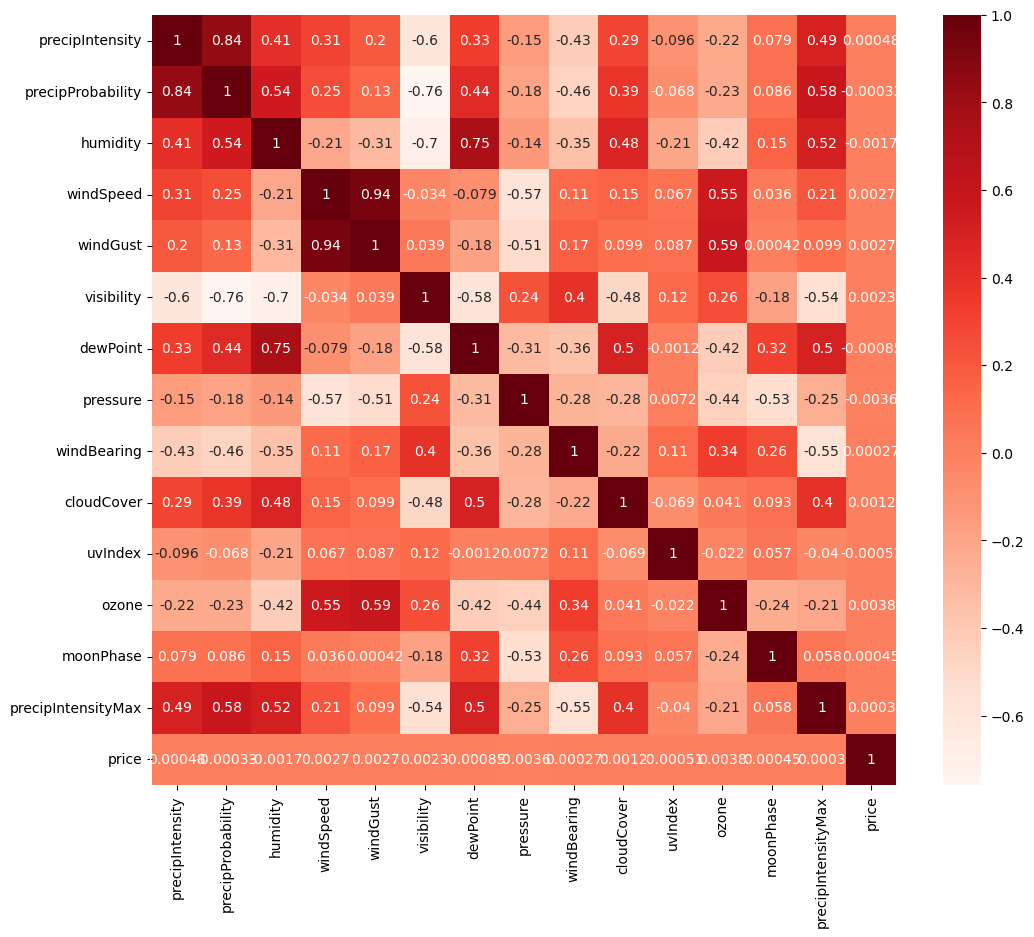

In [14]:
correlation = plt.figure(figsize=(12, 10))
sns.heatmap(weather_column.corr(), cmap='Reds', annot=True)
plt.show() 

Berdasarkan hasil dari korelasi antar kolom diatas dapat diketahui bahwa price tidak dipengaruhi oleh kolom weather dan temperature. Sehingga pengolahan data selanjutnya menggunakan kolom yang belum digunakan pada pemrosesan sebelumnya.

In [15]:
df2= df[['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier','short_summary', 'price']]
df2.head(10)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,short_summary,price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,Rain,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,Clear,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,Clear,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.0
5,18,17,12,Haymarket Square,North Station,Lyft,Lux Black,0.44,1.0,Overcast,16.5
6,5,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,1.08,1.0,Overcast,10.5
7,19,2,12,Back Bay,Northeastern University,Lyft,Lux Black,1.08,1.0,Light Rain,16.5
8,6,3,12,Back Bay,Northeastern University,Lyft,Shared,1.08,1.0,Foggy,3.0
9,10,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,1.08,1.0,Light Rain,27.5


In [16]:
df2.rename(columns={'source': 'Pick_up', 
                    'cab_type':'Brand', 
                    'short_summary' : 'Weather',
                    'hour' : 'Hour', 
                    'day' : 'Date'	, 
                    'month' :'Month', 
                    'destination' : 'Destination', 
                    'name' : 'Service',	
                    'distance' : 'Distance',
                    'surge_multiplier' : 'Surge_multiplier',	
                    'price' : 'Price'
                    }, inplace= True)     #Melakukan rename agar lebih mudah mengingat nama kolom
df2.head(10)

,Hour,Date,Month,Pick_up,Destination,Brand,Service,Distance,Surge_multiplier,Weather,Price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,Rain,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,Clear,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,Clear,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.0
5,18,17,12,Haymarket Square,North Station,Lyft,Lux Black,0.44,1.0,Overcast,16.5
6,5,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,1.08,1.0,Overcast,10.5
7,19,2,12,Back Bay,Northeastern University,Lyft,Lux Black,1.08,1.0,Light Rain,16.5
8,6,3,12,Back Bay,Northeastern University,Lyft,Shared,1.08,1.0,Foggy,3.0
9,10,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,1.08,1.0,Light Rain,27.5


In [17]:
df2.describe()

,Hour,Date,Month,Distance,Surge_multiplier,Price
count,582066.000000,582066.000000,582066.000000,582066.000000,582066.000000,582066.000000
mean,11.612833,17.618732,11.596972,2.217198,1.016499,16.769836
std,6.939188,9.976178,0.490507,1.137834,0.099748,9.436985
min,0.000000,1.000000,11.000000,0.020000,1.000000,2.500000
25%,6.000000,13.000000,11.000000,1.310000,1.000000,9.000000
50%,12.000000,17.000000,12.000000,2.190000,1.000000,14.000000
75%,18.000000,27.000000,12.000000,2.960000,1.000000,22.500000
max,23.000000,30.000000,12.000000,7.860000,3.000000,97.500000


## Melihat Nilai Skewness

In [18]:
skewness = df2[[ 'Distance','Price']]

In [19]:
# Menghitung skewness untuk setiap variabel
skewness_values = {var: df2[var].skew() for var in skewness}

# Melakukan sorting nilai skewness dari tertinggi ke terendah
sorted_skewness = sorted(skewness_values.items(), key=lambda x: x[1], reverse=True)

# Menampilkan nilai skewness yang sudah diurutkan
for var, skewness in sorted_skewness:
    print(f'{var} - Skewness: {skewness:.2f}')


Price - Skewness: 1.03
Distance - Skewness: 0.83


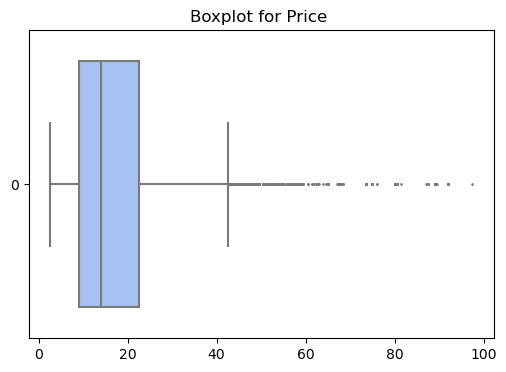

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(df2['Price'], color='#99befd', fliersize=1,orient='h')
plt.title(f'Boxplot for Price ')
plt.show()

## Penanganan Outliers

In [21]:
Q1 = df2['Price'].quantile(0.25)  #rumus Q1
Q3 = df2['Price'].quantile(0.75)  #rumus Q3
IQR = Q3 - Q1

min_IQR = Q1 - (1.5*IQR) # Lower(batas bawah)
max_IQR = Q3 + (1.5*IQR) # Upper (batas atas)

outliers_upper = df2['Price'][(df2['Price'] > max_IQR)]
outliers_lower = df2['Price'][(df2['Price'] < min_IQR)]


print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR Price = ', IQR)

Q1 =  9.0
Q3 =  22.5
IQR Price =  13.5


In [22]:
# Menghapus data outliers
print('Jumlah data sebelum data outlier dihapus: ',df2.shape[0])
df2 = df2.loc[df2['Price'] < max_IQR]
df2 = df2.loc[df2['Price'] > min_IQR]
print('Jumlah data setelah outlier dihapus: ',df2.shape[0])

Jumlah data sebelum data outlier dihapus:  582066
Jumlah data setelah outlier dihapus:  576512


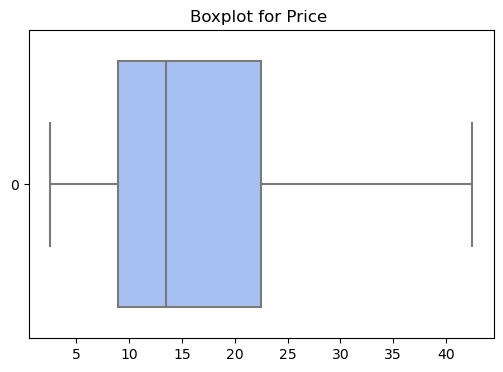

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(df2['Price'], color='#99befd', fliersize=1,orient='h')
plt.title(f'Boxplot for Price ')
plt.show()

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576512 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Hour              576512 non-null  int64  
 1   Date              576512 non-null  int64  
 2   Month             576512 non-null  int64  
 3   Pick_up           576512 non-null  object 
 4   Destination       576512 non-null  object 
 5   Brand             576512 non-null  object 
 6   Service           576512 non-null  object 
 7   Distance          576512 non-null  float64
 8   Surge_multiplier  576512 non-null  float64
 9   Weather           576512 non-null  object 
 10  Price             576512 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 68.9+ MB


# Explorasi Data

In [25]:
df2["Brand"].value_counts()

Brand
Lyft    288983
Uber    287529
Name: count, dtype: int64

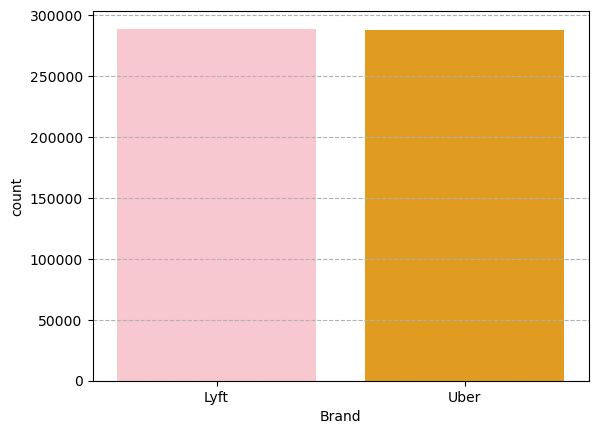

In [26]:
sns.countplot(x="Brand", data=df2, palette= ['pink', 'orange'])
plt.grid(axis='y', linestyle='--')
plt.show()

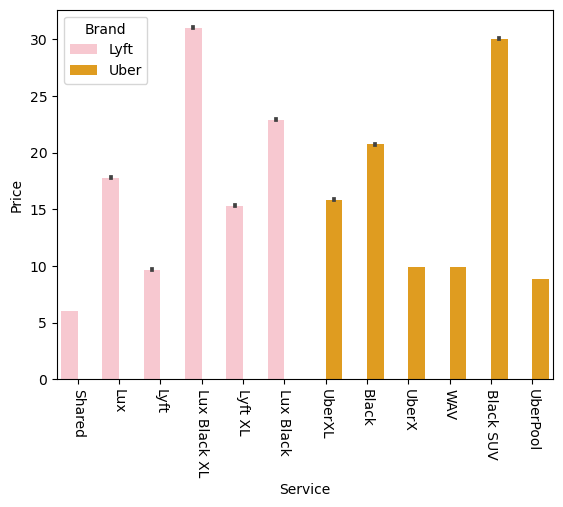

In [27]:
sns.barplot(y= "Price",x="Service",  data=df2, hue="Brand", palette= ['pink', 'orange'])
plt.xticks(rotation=-90)
plt.show()

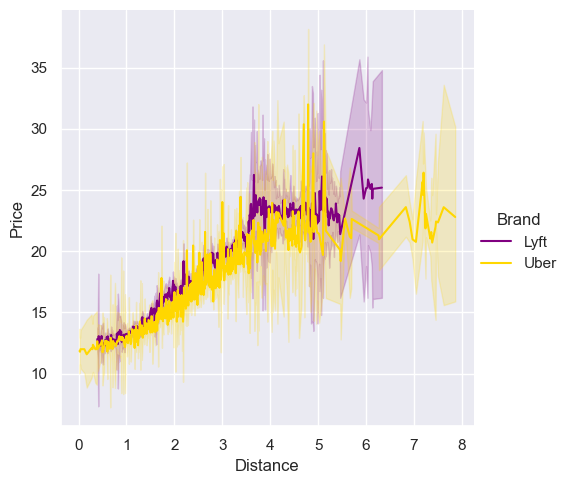

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='Distance',
            y='Price',
            data= df2,
            hue='Brand',
            palette = ['purple','gold'])

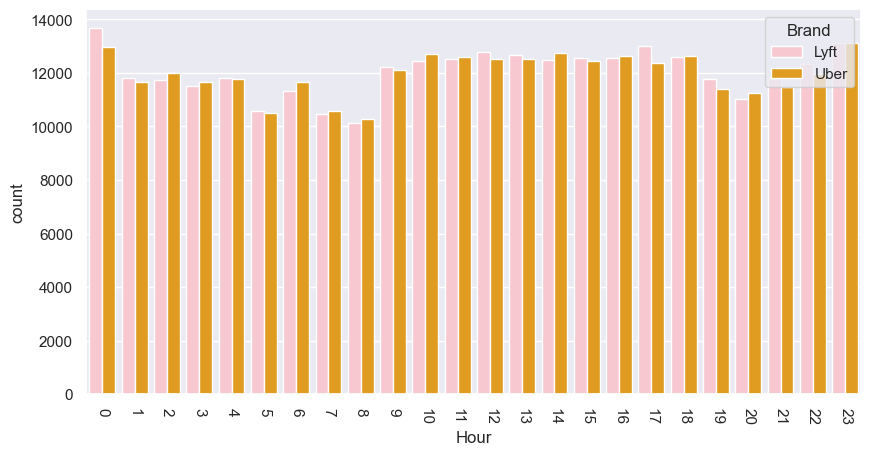

In [29]:
sns.countplot(x="Hour", data=df2, hue="Brand", palette= ['pink', 'orange'])
plt.xticks(rotation=-90)
plt.show()

In [30]:
pd.crosstab(df2['Brand'], df2['Weather']).style.highlight_max(axis=0, color='lightblue')

Weather,Clear,Drizzle,Foggy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Rain
Brand,,,,,,,,,
Lyft,36672,2963,3816,22815,60406,91838,53168,7655,9650
Uber,37109,3245,3825,22678,59647,90937,52608,7990,9490


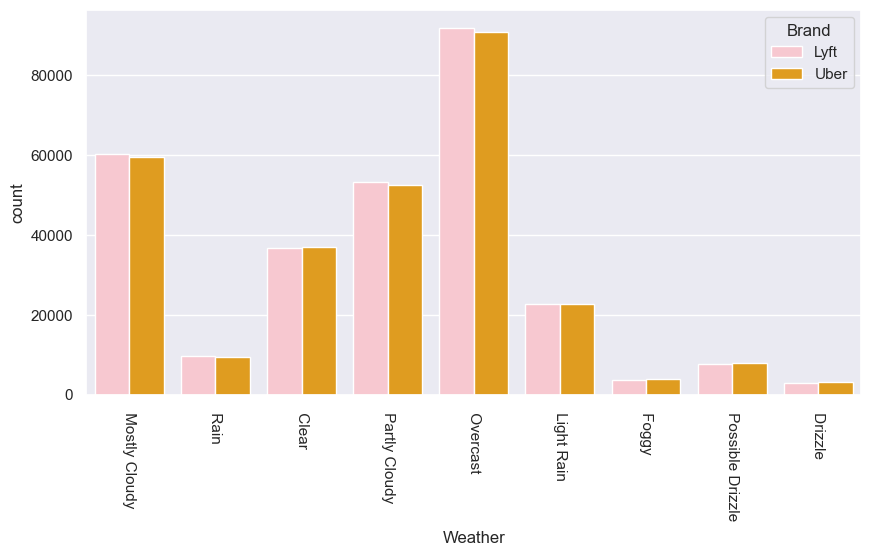

In [31]:
sns.countplot(x="Weather", data=df2, hue="Brand", palette= ['pink', 'orange'])
plt.xticks(rotation=-90)
plt.show()

In [32]:
# Mengetahui rata-rata harga jenis mobil taxi ke location
trip_price = df2.pivot_table(values='Price',
                       index=['Brand'],
                       columns=['Pick_up','Destination'],
                       aggfunc=np.mean,
                       fill_value=0)


trip_price.loc['mean'] = trip_price.mean()


trip_price = trip_price.T
trip_price = trip_price.reset_index(drop=False)
trip_price.sort_values('mean', ascending=False, inplace=True)

In [33]:
trip_price.head(10)

Brand,Pick_up,Destination,Lyft,Uber,mean
24,Financial District,Boston University,23.159566,22.095530,22.627548
14,Boston University,Financial District,23.469359,21.703708,22.586534
25,Financial District,Fenway,23.370866,21.632424,22.501645
20,Fenway,Financial District,23.331524,21.136961,22.234243
50,Northeastern University,Financial District,22.899510,20.735694,21.817602
28,Financial District,Northeastern University,21.381401,20.143604,20.762503
15,Boston University,North Station,20.861203,19.156219,20.008711
51,Northeastern University,North Station,20.564183,18.721265,19.642724
36,North End,Back Bay,20.285954,18.913500,19.599727
21,Fenway,North Station,20.691540,18.471776,19.581658


# Pre-Processing

In [34]:
le = LabelEncoder()

df_encode = df2.copy()
for i in df_encode.select_dtypes('object').columns:
    df_encode[i] = le.fit_transform(df_encode[i])

In [35]:
df_encode

,Hour,Date,Month,Pick_up,Destination,Brand,Service,Distance,Surge_multiplier,Weather,Price
0,9,16,12,5,7,0,7,0.44,1.0,4,5.0
1,2,27,11,5,7,0,2,0.44,1.0,8,11.0
2,1,28,11,5,7,0,5,0.44,1.0,0,7.0
3,4,30,11,5,7,0,4,0.44,1.0,0,26.0
4,3,29,11,5,7,0,6,0.44,1.0,6,9.0
...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,11,6,1,11,1.00,1.0,6,9.5
693066,23,1,12,11,6,1,10,1.00,1.0,6,13.0
693067,23,1,12,11,6,1,9,1.00,1.0,6,9.5
693069,23,1,12,11,6,1,1,1.00,1.0,6,27.0


In [36]:
X = df_encode.drop(columns=['Price'],axis=1).values
y = df_encode['Price'].values

In [37]:
st = StandardScaler()

In [38]:
#X, y train test split
X_train , x_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.30 ,random_state= 0)
print("{0:0.2f}% nilai training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nilai test set". format((len(x_test)/len(df.index)) * 100))

69.33% nilai training set
29.71% nilai test set


# Definisi Model

## Linear Regressin Label encode

In [39]:
lr = LinearRegression()
# Lakukan pelatihan dengan model yang telah diatur
model_train=lr.fit(X_train, y_train)


In [40]:
y_pred = model_train.predict(x_test)
lr.score(X_train, y_train)

0.49122570005208943

In [41]:
# Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
R_squared = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)  

# Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse) 

# Mencetak nilai R-squared, MSE, RMSE
print("R-squared :", R_squared)  
print("MSE :", mse)
print("RMSE :", rmse)  

R-squared : 0.49183688753546073
MSE : 39.80466616018038
RMSE : 6.309093925452401


In [42]:
errors = abs(y_pred - y_test)
Acc = 100 * (errors/ y_test)
accuracy_encode = 100 - np.mean(Acc)
print("Accuracy:", round(accuracy_encode, 2), "%.")

Accuracy: 60.3 %.


## Linear Regression One Hot Encode

In [43]:
df_OHE = pd.DataFrame(df2.loc[:,['Pick_up', 'Destination'	,'Brand','Service','Price','Distance','Surge_multiplier','Weather']])
df_OHE.head()

,Pick_up,Destination,Brand,Service,Price,Distance,Surge_multiplier,Weather
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


In [44]:
def one_hot_encoder(data, feature, keep_first=True):

    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)

    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [45]:
# Melakukan copy dataframe df_kondisi3 menjadi df_onehot_kondisi3
df_ohe2 = df_OHE.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_ohe2.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_ohe2= one_hot_encoder(df_ohe2, col)

df_ohe2 = df_ohe2.replace({True: 1, False: 0})

df_ohe2

,Price,Distance,Surge_multiplier,Pick_up_Back Bay,Pick_up_Beacon Hill,Pick_up_Boston University,Pick_up_Fenway,Pick_up_Financial District,Pick_up_Haymarket Square,Pick_up_North End,Pick_up_North Station,Pick_up_Northeastern University,Pick_up_South Station,Pick_up_Theatre District,Pick_up_West End,Destination_Back Bay,Destination_Beacon Hill,Destination_Boston University,Destination_Fenway,Destination_Financial District,Destination_Haymarket Square,Destination_North End,Destination_North Station,Destination_Northeastern University,Destination_South Station,Destination_Theatre District,Destination_West End,Brand_Lyft,Brand_Uber,Service_Black,Service_Black SUV,Service_Lux,Service_Lux Black,Service_Lux Black XL,Service_Lyft,Service_Lyft XL,Service_Shared,Service_UberPool,Service_UberX,Service_UberXL,Service_WAV,Weather_ Clear,Weather_ Drizzle,Weather_ Foggy,Weather_ Light Rain,Weather_ Mostly Cloudy,Weather_ Overcast,Weather_ Partly Cloudy,Weather_ Possible Drizzle,Weather_ Rain
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
693066,13.0,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
693067,9.5,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
693069,27.0,1.00,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
X = df_ohe2.drop(columns=['Price'],axis=1).values
y = df_ohe2['Price'].values

In [47]:
st = StandardScaler()

In [48]:
#X, y train test split
X_train , x_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.30 ,random_state= 0)
print("{0:0.2f}% nilai training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nilai test set". format((len(x_test)/len(df.index)) * 100))

69.33% nilai training set
29.71% nilai test set


In [49]:
lr = LinearRegression()
# Lakukan pelatihan dengan model yang telah diatur
model_train_OHE=lr.fit(X_train, y_train)


In [50]:
y_pred = model_train_OHE.predict(x_test)
lr.score(X_train, y_train)

0.9327046907856996

In [51]:
# Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
R_squared = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)  

# Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse) 

# Mencetak nilai R-squared, MSE, RMSE
print("R-squared :", R_squared)  
print("MSE :", mse)
print("RMSE :", rmse)  

R-squared : 0.9333175200499059
MSE : 5.223271402509842
RMSE : 2.2854477466154948


In [52]:
errors = abs(y_pred - y_test)
Acc = 100 * (errors/ y_test)
accuracy_OHE = 100 - np.mean(Acc)
print("Accuracy:", round(accuracy_OHE, 2), "%.")

Accuracy: 87.06 %.


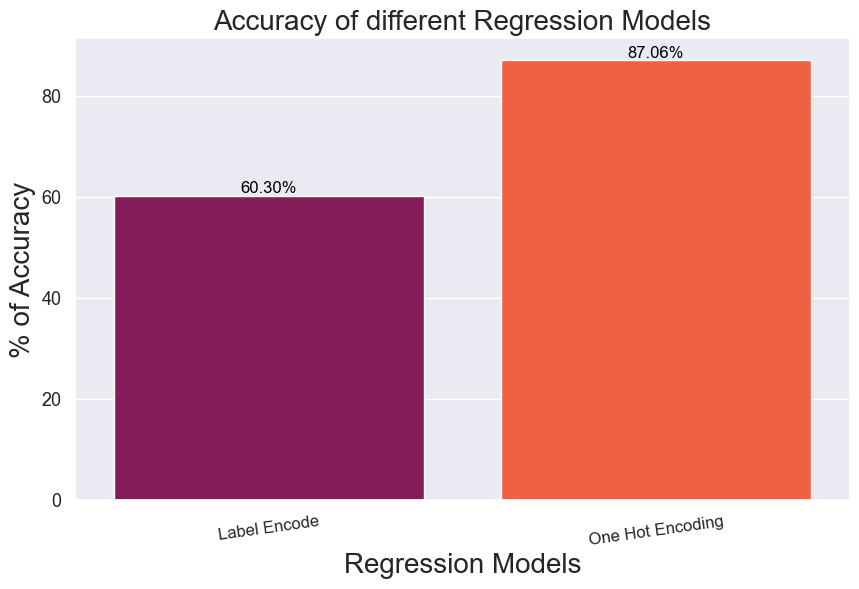

In [53]:
# Data
models = ['Label Encode', 'One Hot Encoding']
accuracy_models = [accuracy_encode, accuracy_OHE]

# Membuat barplot
plt.rcParams['figure.figsize']=10,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=accuracy_models, palette = "rocket", saturation =1.5)
plt.xlabel("Regression Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Regression Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for i, v in enumerate(accuracy_models):
    ax.text(i, v + 0.5, f"{v:.2f}%", color='black', ha='center', fontsize=12)
plt.show()

Nilai akurasi dari One Hot Encoding (OHE) lebih tinggi dikarenakan OHE melakukan pemrosesan mengubah kolom data kategorikal menjadi nilai biner. Dalam OHE memastikan tiap kategori menjadi kolom baru untuk masing-masing kolom mempunyai nilai biner tersendiri.Sedangkan berbeda dengan Label Encoder hanya mengubah saja nilai kategorikal menjadi nilai biner.

# Model Inference

In [54]:
df_new = {'distance' : [5.55, 0.21, 10.8], 'surge_multiplier':[3,2,1], 
          'Pickup_loc_Back Bay':[0,0,0],'Pickup_loc_Beacon Hill': [0,0,0], 'Pickup_loc_Boston University':[0,0,0],
          'Pickup_loc_Fenway': [0,0,0], 
          'Pickup_loc_Financial District': [1,0,1],
          'Pickup_loc_Haymarket Square': [0,0,0], 
          'Pickup_loc_North End': [0,0,0],
          'Pickup_loc_North Station': [0,0,0], 
          'Pickup_loc_Northeastern University': [0,0,0],
          'Pickup_loc_South Station': [0,0,0], 
          'Pickup_loc_Theatre District': [0,0,0],
          'Pickup_loc_West End': [0,1,0], 
          'destination_Back Bay': [0,0,0],
          'destination_Beacon Hill': [0,0,0],
          'destination_Boston University': [1,0,0],
          'destination_Fenway': [0,0,1], 
          'destination_Financial District': [0,0,0],
          'destination_Haymarket Square': [0,0,0], 
          'destination_North End': [0,1,0],
          'destination_North Station': [0,0,0], 
          'destination_Northeastern University': [0,0,0],
          'destination_South Station' : [0,0,0], 
          'destination_Theatre District' : [0,0,0],
          'destination_West End' : [0,0,0], 
          'Taxi_Lyft' : [0,1,0], 'Taxi_Uber' :[1,0,1], 
          'name_Black':[1,0,0],'name_Black SUV': [0,0,0], 
          'name_Lux': [0,0,0], 'name_Lux Black': [0,1,0], 
          'name_Lux Black XL': [0,0,0], 'name_Lyft' : [0,0,0], 
          'name_Lyft XL': [0,0,0], 'name_Shared' : [0,0,0], 
          'name_UberPool': [0,0,0],'name_UberX': [0,0,0], 
          'name_UberXL': [0,0,1], 'name_WAV': [0,0,0], 
          'weather_ Clear ': [1,0,0],'weather_ Drizzle ': [0,1,0],
          'weather_ Foggy ': [0,0,0], 'weather_ Light Rain ':[0,0,0],
          'weather_ Mostly Cloudy ': [0,0,0], 'weather_ Overcast ': [0,0,1],
          'weather_ Partly Cloudy ': [0,0,0], 'weather_ Possible Drizzle ': [0,0,0],
          'weather_ Rain ': [0,0,0]}

df_new = pd.DataFrame(df_new)
df_new

,distance,surge_multiplier,Pickup_loc_Back Bay,Pickup_loc_Beacon Hill,Pickup_loc_Boston University,Pickup_loc_Fenway,Pickup_loc_Financial District,Pickup_loc_Haymarket Square,Pickup_loc_North End,Pickup_loc_North Station,Pickup_loc_Northeastern University,Pickup_loc_South Station,Pickup_loc_Theatre District,Pickup_loc_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,Taxi_Lyft,Taxi_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,5.55,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.21,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,10.80,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [55]:
price_predict = model_train_OHE.predict(df_new)
price_predict

array([57.26757812, 30.77197266, 39.42236328])

# Kesimpulan
Berdasarkan hasil pemodelan diatas dapat ditarik kesimpulan bahwa :
- Sebanyak 57 kolom yang ada relevansi untuk digunakan atau yang mempengaruhi Target (Price) hanya sebanyak 10 kolom saja.
- Besaran nilai price paling berpengaruh oleh jarak tempuh yang dipilih.
- Cuaca dan suhu memiliki korelasi yang sangat kecil pada penentuan nilai tarif uber dan lyft.
- Accuracy menggunakan One Hot Encoding lebih tinggi dibandingkan dengan Label Encoding.